In [59]:
import numpy as np
import plotly as py
import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import polyfit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from mpl_toolkits.mplot3d import Axes3D


In [77]:
data = pd.read_csv("../Analysis Data/exercise.csv")
ndata = data[-20:]
cdata = data
data = data.dropna()

print(data)
print(ndata)

        y    x1     x2
0   15.68  6.87  14.09
1    6.18  4.40   4.35
2   18.10  0.43  18.09
3    9.07  2.73   8.65
4   17.97  3.25  17.68
5   10.04  5.30   8.53
6   20.74  7.08  19.50
7    9.76  9.73   0.72
8    8.23  4.51   6.88
9    6.52  6.40   1.26
10  15.69  5.72  14.62
11  15.51  6.28  14.18
12  20.61  6.14  19.68
13  19.58  8.26  17.75
14   9.72  9.41   2.44
15  16.36  2.88  16.10
16  18.30  5.74  17.37
17  13.26  0.45  13.25
18  12.10  3.74  11.51
19  18.15  5.03  17.44
20  16.80  9.67  13.74
21  16.55  3.62  16.15
22  18.79  2.54  18.62
23  15.68  9.15  12.74
24   4.08  0.69   4.02
25  15.45  7.97  13.24
26  13.44  2.49  13.21
27  20.86  9.81  18.41
28  16.05  7.56  14.16
29   6.00  0.98   5.92
30   3.29  0.65   3.22
31   9.41  9.00   2.74
32  10.76  7.83   7.39
33   5.98  0.26   5.97
34  19.23  3.64  18.89
35  15.67  9.28  12.63
36   7.04  5.66   4.18
37  21.63  9.71  19.32
38  17.84  9.36  15.19
39   7.49  0.88   7.43
     y    x1     x2
40 NaN  9.87  10.43
41 NaN  9.99  15.

In [78]:
results = smf.ols('y ~ x1 + x2', data=data).fit()
wyn=results.params

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        07:25:57   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

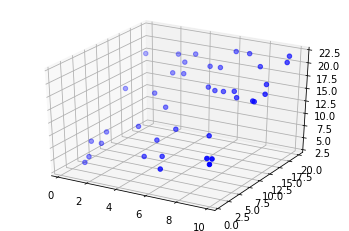

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x1'], data['x2'], data['y'], c='blue')

In [80]:
X = data[['x1', 'x2', 'y']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

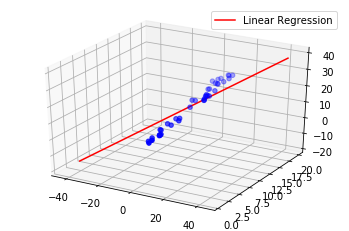

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'], data['x2'], data['y'], c='blue')
ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()

plt.show()

In [73]:
predictions = data
#X = data[['x1', 'x2', 'y']]
predictions['y_predictions'] = results.predict()
predictions['residuals'] = predictions['y'] - predictions['y_predictions']

print(predictions)

        y    x1     x2  y_predictions  residuals
0   15.68  6.87  14.09      16.221378  -0.541378
1    6.18  4.40   4.35       7.090400  -0.910400
2   18.10  0.43  18.09      16.133677   1.966323
3    9.07  2.73   8.65       9.700421  -0.630421
4   17.97  3.25  17.68      17.254606   0.715394
5   10.04  5.30   8.53      10.926653  -0.886653
6   20.74  7.08  19.50      20.694923   0.045077
7    9.76  9.73   0.72       6.905222   2.854778
8    8.23  4.51   6.88       9.188536  -0.958536
9    6.52  6.40   1.26       5.626640   0.893360
10  15.69  5.72  14.62      16.057014  -0.367014
11  15.51  6.28  14.18      15.990263  -0.480263
12  20.61  6.14  19.68      20.356247   0.253753
13  19.58  8.26  17.75      19.890290  -0.310290
14   9.72  9.41   2.44       8.128384   1.591616
15  16.36  2.88  16.10      15.789193   0.570807
16  18.30  5.74  17.37      18.286339   0.013661
17  13.26  0.45  13.25      12.238483   1.021517
18  12.10  3.74  11.51      12.528169  -0.428169
19  18.15  5.03  17.

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



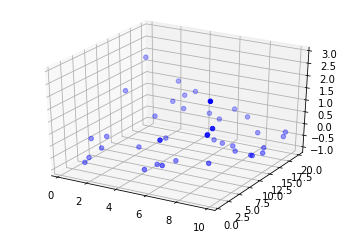

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'], data['x2'], predictions['residuals'], c='blue')

plt.show()

In [83]:
newX = [ndata['x1'],ndata['x2'],ndata['y']]


In [91]:
predictions = cdata

predictions['y_predictions'] = results.predict(cdata)

print(predictions)

        y    x1     x2  y_predictions
0   15.68  6.87  14.09      16.221378
1    6.18  4.40   4.35       7.090400
2   18.10  0.43  18.09      16.133677
3    9.07  2.73   8.65       9.700421
4   17.97  3.25  17.68      17.254606
5   10.04  5.30   8.53      10.926653
6   20.74  7.08  19.50      20.694923
7    9.76  9.73   0.72       6.905222
8    8.23  4.51   6.88       9.188536
9    6.52  6.40   1.26       5.626640
10  15.69  5.72  14.62      16.057014
11  15.51  6.28  14.18      15.990263
12  20.61  6.14  19.68      20.356247
13  19.58  8.26  17.75      19.890290
14   9.72  9.41   2.44       8.128384
15  16.36  2.88  16.10      15.789193
16  18.30  5.74  17.37      18.286339
17  13.26  0.45  13.25      12.238483
18  12.10  3.74  11.51      12.528169
19  18.15  5.03  17.44      17.977308
20  16.80  9.67  13.74      17.380425
21  16.55  3.62  16.15      16.210499
22  18.79  2.54  18.62      17.647595
23  15.68  9.15  12.74      16.305805
24   4.08  0.69   4.02       4.914170
25  15.45  7